In [1]:
pwd

'C:\\Users\\acer\\Desktop\\python practice\\practice-datsets\\turkey-student-evaluation'

In [2]:
# Importing the pandas library to read the data and data manipulation
import pandas as pd

In [3]:
# Loaded the data into the data frame
df = pd.read_csv('turkiye-student-evaluation_generic.csv')

In [4]:
# checking the first five rows
df.head()

,instr,class,nb.repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q19,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [5]:
# Checking the null in the data
df.isnull().sum()

instr         0
class         0
nb.repeat     0
attendance    0
difficulty    0
Q1            0
Q2            0
Q3            0
Q4            0
Q5            0
Q6            0
Q7            0
Q8            0
Q9            0
Q10           0
Q11           0
Q12           0
Q13           0
Q14           0
Q15           0
Q16           0
Q17           0
Q18           0
Q19           0
Q20           0
Q21           0
Q22           0
Q23           0
Q24           0
Q25           0
Q26           0
Q27           0
Q28           0
dtype: int64

In [6]:
# shape of the dataframe
df.shape

(5820, 33)

In [7]:
# Changing the column name
df.rename(columns={'nb.repeat':'repeat'},inplace =True)

In [8]:
# import seaborn and matplotlib for visualization
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
%matplotlib inline

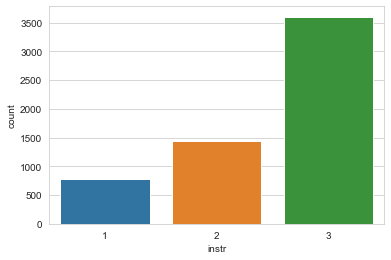

In [9]:
# checking the counts of the instructors in 
sns.countplot(df['instr'])
plt.show()

## We see instructor "3" has taken more class. Might be hard working it is my assumption

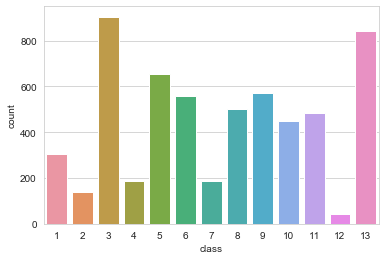

In [10]:
# what classes are mostly taken
sns.countplot(df['class'])
plt.show()

# we can see Most People taken the Class 3

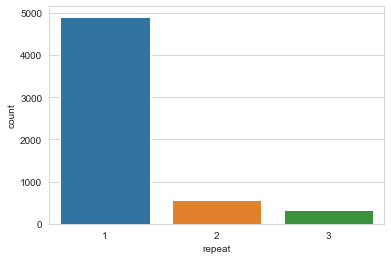

In [11]:
# checking the counts of the Repeat 
sns.countplot(df['repeat'])
plt.show()

# We can see most are taken only once. Repetion might have happened because of the failure in the exam or he loves the subject

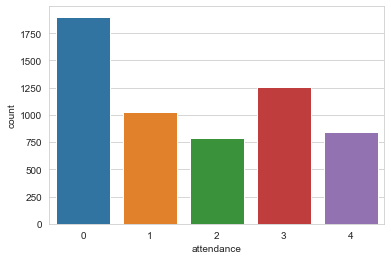

In [12]:
# checking the attendance Catgeory
sns.countplot(df['attendance'])
plt.show()

# Most attendance category is the zero

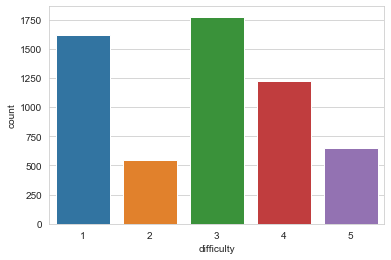

In [13]:
# checking the difficult Catgeory
sns.countplot(df['difficulty'])
plt.show()

# Most people Difficult 3 for the available classes

## We can see all the questions in the dataset are given positive. so i am adding and taking mean to find the best teacher

In [14]:
k = list(df.columns[5:])
k

['Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q8',
 'Q9',
 'Q10',
 'Q11',
 'Q12',
 'Q13',
 'Q14',
 'Q15',
 'Q16',
 'Q17',
 'Q18',
 'Q19',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q25',
 'Q26',
 'Q27',
 'Q28']

In [15]:
# Summing the ratings storing in a column
df['sum']= 0
for j in k:
    df['sum'] = df['sum']+df[j]

#grouping of instructors and taking mean
mean_instr = df[['instr','sum']].groupby(by = 'instr').mean()
mean_instr

,sum
instr,
1,94.587097
2,95.058864
3,85.711191


# we can see from the average that instructor '2' is great 

# i am not going indepth for the available questions 1 to 28. i  don't think they will much information.

# Let's Jump to the Bivariate analysis

In [16]:
df.columns

Index(['instr', 'class', 'repeat', 'attendance', 'difficulty', 'Q1', 'Q2',
       'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13',
       'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23',
       'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'sum'],
      dtype='object')

# Repeation is increasing with the difficulty by excluding the difficulty 2

In [43]:
# Seeing the relationship between the instructor and classes
pd.crosstab(df['class'],df['instr'])

instr,1,2,3
class,,,
1,0,303,0
2,140,0,0
3,0,0,904
4,0,0,187
5,0,0,656
6,0,558,0
7,187,0,0
8,0,0,500
9,0,0,571


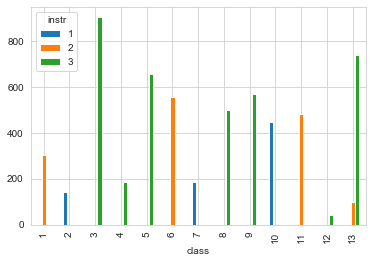

In [18]:
# Seeing the relationship between the instructor and classes

pd.crosstab(df['class'],df['instr']).plot(kind = 'bar')
plt.show()

# As we can see the dataframe. No repetition of the same class by the instructors other than '13 class'. Most subjects have been taken by the Instructor '3'

In [ ]:
# from the above graph. we can see that repeat is more for the  12 and 13

In [23]:
repeat = pd.crosstab(df.repeat, df.difficulty)
repeat

difficulty,1,2,3,4,5
repeat,,,,,
1,1511,395,1470,1017,516
2,60,113,211,127,65
3,49,41,93,81,71


In [24]:
# checking is there any relationship between repeat and difficulty
from scipy.stats import chi2_contingency
chi2_stat,pval,dof,ex = chi2_contingency(repeat)
print(pval)

1.1868875648364934e-42


### Less P-value indicating that there is relationship between the variables of repeat and difficulty

In [124]:
# Forming the clusters with the given data

In [123]:
# importing the standard scaler and standard scaling the values

from sklearn.preprocessing import StandardScaler

# intiating the standard scaler
std = StandardScaler()

# fitting and transforming the data
data = std.fit_transform(df)

In [140]:
# importing the kmeans clustering

from sklearn.cluster import KMeans

# checking best number of clusters by using with in sum of squares
# wss is the list of with in sumof squares

WSS = []

for i in range(1,15):
    # init kmeans++ smartly intializies the clusters
    k = KMeans(n_clusters=i, init = 'k-means++')
    k.fit(data)
    WSS.append(k.inertia_)

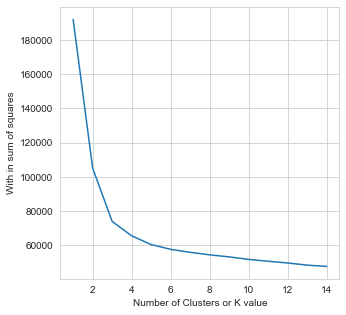

In [150]:
from pylab import rcParams
rcParams['figure.figsize'] = 5, 5
plt.plot(range(1,15),WSS)
plt.xlabel('Number of Clusters or K value')
plt.ylabel('With in sum of squares')
plt.show()

# From above graph we found that 'Three Clusters ' is best combination

In [155]:
# Bulding the clusters by the Kmeans

k = KMeans(n_clusters=3, init = 'k-means++')
results = k.fit_predict(data)

In [164]:
results.shape

(5820,)

### Shape of the results matches to the number of rows of the data frame

In [161]:
# created the column which gives information about cluster for the given observation
df['cluster'] = results

In [162]:
# checking the first  five observations
df.head()

,instr,class,repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,cluster
0,1,2,1,0,4,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
1,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
2,1,2,1,2,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1
3,1,2,1,1,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,0
4,1,2,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [166]:
# checking the last five observations
df.tail()

,instr,class,repeat,attendance,difficulty,Q1,Q2,Q3,Q4,Q5,...,Q20,Q21,Q22,Q23,Q24,Q25,Q26,Q27,Q28,cluster
5815,3,13,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
5816,3,13,1,3,4,4,4,4,4,4,...,5,5,5,4,5,5,5,5,5,1
5817,3,13,1,0,4,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,1
5818,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2
5819,3,13,1,1,2,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,2


In [167]:
# checking how many observations each cluster has

df['cluster'].value_counts()

0    2365
1    2225
2    1230
Name: cluster, dtype: int64

# Most of the observations belongs to the First cluster